In [1]:
%matplotlib inline
import api
import helpers
import evaluation
import implementations
import split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [154]:
y, x, _ = helpers.load_csv_data('data/train.csv', sub_sample = True, background_value = -1)

In [155]:
n_iters = 50000
gamma = 0.000001
lambda_ = 0
initial_w = 0

cut  = np.linspace(0.3, 0.8, 20)

In [156]:
# split data into 8 group
split_train = split.split(y, x, method='mass')

In [157]:
lambdas

array([ 0.68 ,  0.685,  0.69 ,  0.695,  0.7  ,  0.705,  0.71 ,  0.715])

Processing set 0 ...-------------------------------------
Set 0 :
-------------------------------------
lambda*: 1.59985871961e-05
degree:  2
test set loss:  0.42174701912
Processing set 1 ...

KeyboardInterrupt: 

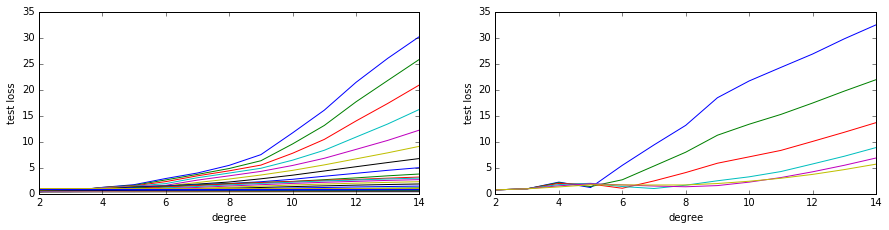

In [163]:
ws = []
tr_losses = []
te_losses = []
accus = []

degrees = range(2, 15)
lambdas = np.logspace(-10, 5)

#degrees = range(0, 2)
#lambdas = np.logspace(-5, 0, 3)

plt.figure(1, figsize=(15, 15))

for i, splitted_set in enumerate(split_train):
    # contain best_lambda, best_degree and best_teloss
    best = 0, 0, float("inf")
    sub_y, sub_x, id_indices = splitted_set # jet 0 with no mass

    for l in lambdas:
        ws = []
        tr_losses = []
        te_losses = []
        accus = []

        for degree in degrees:
            w, tr_loss, te_loss, accu = api._inner_train(sub_y, sub_x, poly = degree, replace=None, cv=True, cut=0.,\
                                                 model_func=implementations.ridge_regression, \
                                                lambda_=l)
            ws.append(w)
            tr_losses.append(tr_loss)
            te_losses.append(te_loss)
            accus.append(accu)
            if te_loss < best[2]:
                best = (l, degree, te_loss)

        plt.subplot(4,2,i+1)
        plt.xlabel("degree")
        plt.ylabel("test loss")
        plt.plot(degrees, te_losses)
        
    print("-------------------------------------")
    print("Set", i, ":")
    print("-------------------------------------")
    print("lambda*:", best[0])
    print("degree: ", best[1])
    print("test set loss: ", best[2])
    
    
plt.savefig('test_fig.pdf', format='pdf')
plt.show()

lambda  0.68
lambda  0.685
lambda  0.69
lambda  0.695
lambda  0.7
lambda  0.705
lambda  0.71
lambda  0.715


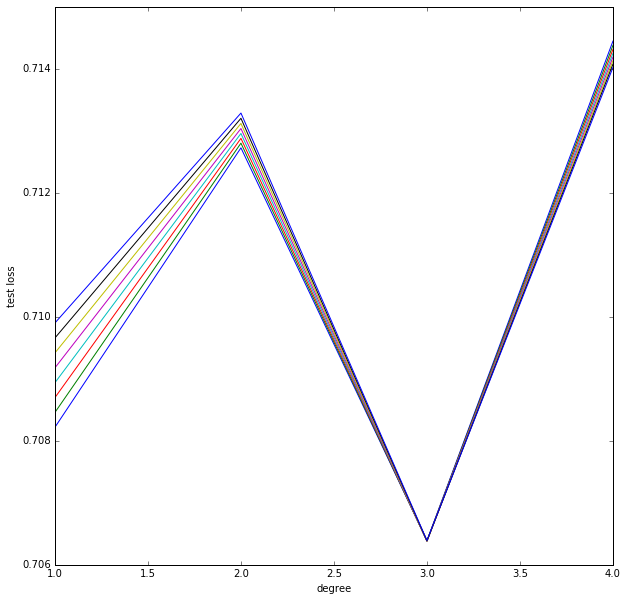

In [111]:
### ZOOM

ws = []
tr_losses = []
te_losses = []
accus = []

degrees = range(0, 8)
lambdas = np.logspace(-5, 0, 10)

plt.figure(1, figsize=(10, 10))

def cross_validation_zoom(y, x, degrees, lambdas):
    for l in lambdas:
        print("lambda ", l)
        ws = []
        tr_losses = []
        te_losses = []
        accus = []

        for degree in degrees:
            w, tr_loss, te_loss, accu = api._inner_train(sub_y, sub_x, poly = degree, replace=None, cv=True, cut=0.5,\
                                                 model_func=implementations.ridge_regression, \
                                                lambda_=l)
            ws.append(w)
            tr_losses.append(tr_loss)
            te_losses.append(te_loss)
            accus.append(accu)

        plt.xlabel("degree")
        plt.ylabel("test loss")
        plt.plot(degrees, te_losses)

    plt.savefig('test_fig.pdf', format='pdf')
    plt.show()
    

    
sub_y, sub_x, id_indices = split_train[6]
degrees = range(1, 5)
#lambdas = np.logspace(-1, 0, 7)
lambdas = np.arange(0.68, 0.72, 0.005)
cross_validation_zoom(sub_y, sub_x, degrees, lambdas )


In [45]:
range(1, 3)

range(1, 3)

In [151]:
9.000e-06 + 1

1.000009

In [152]:
LAMBDAS = [9.000e-06, 2.120e-02, 1.648e-05, 2.700e-04, 2.420e-06, 3.090e-04, 4.000e-05, 3.630e-10]
DEGREES = [12, 9, 7, 9, 10, 10, 8, 9]

w = api.train(y, x, poly=DEGREES, split_method='mass', replace=None, cv=True, cut=0., 
               model_func=implementations.ridge_regression, lambdas = LAMBDAS)

np.mean(np.array(w)[:,3])

0.83095352084726415

In [153]:
np.array(w)

array([[-0.01694796,  0.42205923,  0.42487182,  0.94509954],
       [-0.01526123,  0.87090125,  0.87108813,  0.69017998],
       [-0.01685132,  0.52128091,  0.53442593,  0.91402116],
       [-0.03527061,  0.85519287,  0.85598011,  0.72746499],
       [ 0.01354355,  0.53386561,  0.60571628,  0.89803523],
       [-0.01707506,  0.82198242,  0.82351023,  0.75002109],
       [-0.01366061,  0.44004104,  0.51908883,  0.92615176],
       [-0.01416064,  0.77815072,  0.93152451,  0.79665442]])

In [ ]:
# test if an other cut is better

#LAMBDAS = [0.01, 0.0001, 0.02, 0.00001, 0.02, 0.0001, 1, 0.01]
#DEGREES = [3, 2, 2, 2, 2, 2, 3, 3]

LAMBDAS = [0.0000001, 0.0000001, 0.1, 0.000045, 0.025, 0.000004, 0.7, 0.7]
DEGREES = [2, 2, 3, 2, 2, 3, 3, 3]

ws = []
cuts = np.arange(-0.1, 0.2, 0.05)
tr_losses = []
te_losses = []
accus = []

plt.figure(1, figsize=(10, 10))

for i in cuts:
    print("cut ", i)
    
    w = api.train(y, x, poly=DEGREES, split_method='mass', replace=None, cv=True, cut=i, \
               model_func=implementations.ridge_regression, lambdas = LAMBDAS)

    ws.append(np.mean(np.array(w)[:,3]))

            
plt.xlabel("cut")
plt.ylabel("test loss")
plt.plot(cuts, ws)

plt.savefig('test_fig.pdf', format='pdf')
plt.show()

cut  -0.1


In [144]:
LAMBDAS = [0.0000001, 0.0000001, 0.1, 0.000045, 0.025, 0.000004, 0.7, 0.7]
DEGREES = [2, 2, 3, 2, 2, 3, 3, 3]

w = api.train(y, x, poly=DEGREES, split_method='mass', replace=None, cv=False, cut=0., 
               model_func=implementations.ridge_regression, lambdas = LAMBDAS)

In [145]:
test_y, test_x, test_ids = helpers.load_csv_data('data/test.csv')

In [146]:
api.predict(test_y, test_x, test_ids, 0.5, w, poly=DEGREES, split_method='mass', replace=None, loss_method='ls', res_to_file=True)



OrderedDict([(350000, -1.0),
             (350001, -1.0),
             (350002, -1.0),
             (350003, -1.0),
             (350004, -1.0),
             (350005, -1.0),
             (350006, -1.0),
             (350007, -1.0),
             (350008, -1.0),
             (350009, -1.0),
             (350010, -1.0),
             (350011, -1.0),
             (350012, -1.0),
             (350013, -1.0),
             (350014, -1.0),
             (350015, -1.0),
             (350016, -1.0),
             (350017, -1.0),
             (350018, -1.0),
             (350019, -1.0),
             (350020, -1.0),
             (350021, -1.0),
             (350022, -1.0),
             (350023, -1.0),
             (350024, -1.0),
             (350025, -1.0),
             (350026, -1.0),
             (350027, -1.0),
             (350028, -1.0),
             (350029, -1.0),
             (350030, -1.0),
             (350031, -1.0),
             (350032, -1.0),
             (350033, -1.0),
             (